In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scripts import project_functions,project_functions2,project_functions3

spy = "~/project-group23-project/data/raw/spy.csv"
tsla = "~/project-group23-project/data/raw/TSLA.csv"

In [29]:
x=project_functions.load_and_clean_tsla_spy(spy,tsla)
x



(           Date    open_spy   close_spy    vol_spy
 0    1993-01-29   43.968750   43.937500    1003200
 1    1993-02-01   43.968750   44.250000     480500
 2    1993-02-02   44.218750   44.343750     201300
 3    1993-02-03   44.406250   44.812500     529400
 4    1993-02-04   44.968750   45.000000     531500
 ...         ...         ...         ...        ...
 7024 2020-12-18  370.970001  369.179993  136542300
 7025 2020-12-21  364.970001  367.859985   96386700
 7026 2020-12-22  368.209991  367.239990   47949000
 7027 2020-12-23  368.279999  367.570007   46201400
 7028 2020-12-24  368.079987  369.000000   26457900
 
 [7029 rows x 4 columns],
            Date   open_tsla  close_tsla  vol_tsla
 0    2010-06-29   19.000000   23.889999  18766300
 1    2010-06-30   25.790001   23.830000  17187100
 2    2010-07-01   25.000000   21.959999   8218800
 3    2010-07-02   23.000000   19.200001   5139800
 4    2010-07-06   20.000000   16.110001   6866900
 ...         ...         ...         ...  

In [30]:
spydfcleaned=x[0]
spydfcleaned=project_functions2.remove_dates(spydfcleaned)
spydfcleaned

,Date,open_spy,close_spy,vol_spy
0,2010-06-29,106.019997,104.209999,373649500
1,2010-06-30,103.919998,103.220001,284101700
2,2010-07-01,103.150002,102.760002,382924800
3,2010-07-02,103.110001,102.199997,233385200
4,2010-07-06,103.639999,102.870003,256935300
...,...,...,...,...
2411,2020-01-28,325.059998,326.890015,63834000
2412,2020-01-29,328.380005,326.619995,53888900
2413,2020-01-30,324.359985,327.679993,75491800
2414,2020-01-31,327.000000,321.730011,113845600


In [31]:
finalmergeddf=pd.DataFrame(project_functions3.merge_n_round(spydfcleaned))
finalmergeddf

,Date,open_spy,close_spy,vol_spy,open_tsla,close_tsla,vol_tsla
0,2010-06-29,106.02,104.21,373649500,19.00,23.89,18766300
1,2010-06-30,103.92,103.22,284101700,25.79,23.83,17187100
2,2010-07-01,103.15,102.76,382924800,25.00,21.96,8218800
3,2010-07-02,103.11,102.20,233385200,23.00,19.20,5139800
4,2010-07-06,103.64,102.87,256935300,20.00,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,325.06,326.89,63834000,568.49,566.90,11788500
2412,2020-01-29,328.38,326.62,53888900,575.69,580.99,17801500
2413,2020-01-30,324.36,327.68,75491800,632.42,640.81,29005700
2414,2020-01-31,327.00,321.73,113845600,640.00,650.57,15719300


In [32]:
#EXPLORATORY DATA ANALYSIS STARTS HERE - TASK 3:
#Volume increase/decrease over 10 years
#plot 1 below:
edadf=finalmergeddf[['Date','vol_tsla','vol_spy']]



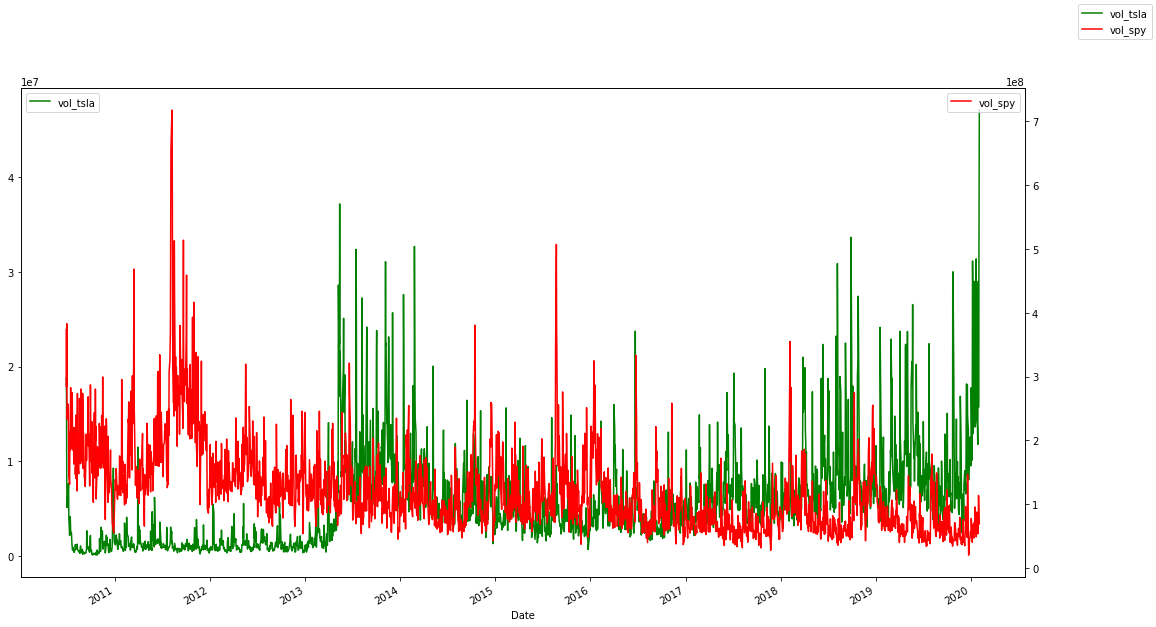

("TSLA's mean volume for the first 365 days traded on the dataset is:", 1406631.7808219178)
("TSLA's mean volume for the last 365 days traded on the dataset is:", 9843472.87671233)
("SPY's mean volume for the first 365 days traded on the dataset is:", 209259411.50684932)
("SPY's mean volume for the last 365 days traded on the dataset is:", 79445112.05479452)


In [33]:
edadf
df = pd.DataFrame(data=edadf)

ax = df.plot(x="Date", y="vol_tsla", legend=True, color="green", figsize=(18,10))

ax2 = ax.twinx()
df.plot(x="Date", y="vol_spy", ax=ax2, legend=True, color="r",figsize=(18,10))
ax.figure.legend()
plt.show()

tslavolfirst365="TSLA's mean volume for the first 365 days traded on the dataset is:",np.mean(df.vol_tsla.head(365))
tslavollast365="TSLA's mean volume for the last 365 days traded on the dataset is:",np.mean(df.vol_tsla.tail(365))
spyvolfirst365="SPY's mean volume for the first 365 days traded on the dataset is:",np.mean(df.vol_spy.head(365))
spyvollast365="SPY's mean volume for the last 365 days traded on the dataset is:",np.mean(df.vol_spy.tail(365))

print(tslavolfirst365)
print(tslavollast365)
print(spyvolfirst365)
print(spyvollast365)
#as you can see, TSLAs volume increased rapidly over the 10 year range, eventually overpassing SPY. 

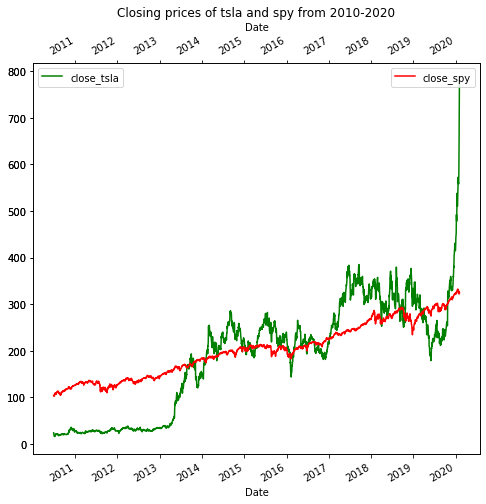

In [70]:
#task3, plot 2.
dfx=finalmergeddf

df = pd.DataFrame(data=dfx)

ax = df.plot(x="Date", y="close_tsla",color="green", figsize=(8,8))

ax2 = ax.twiny()
df.plot(x='Date', y="close_spy", ax=ax2, color="r",figsize=(8,8))
plt.title('Closing prices of tsla and spy from 2010-2020')
plt.show()

#As you can see tsla started lower and then eventually passed SPY. 


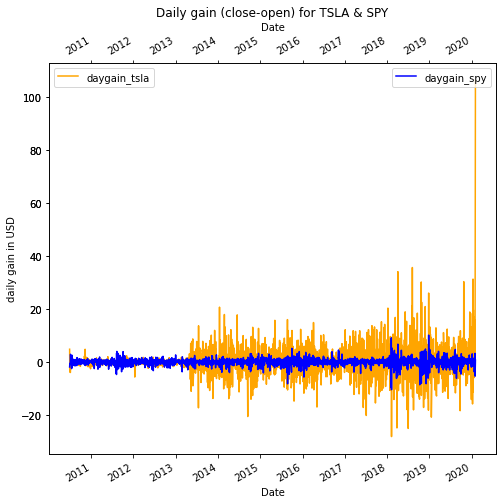

In [90]:
#Task3, plot 3:
dfx['daygain_tsla']=dfx['close_tsla']-dfx['open_tsla']
dfx['daygain_spy']=dfx['close_spy']-dfx['open_spy']
df = pd.DataFrame(data=dfx)

ax = df.plot(x="Date", y="daygain_tsla",color="orange", figsize=(8,8),kind='line')

ax2 = ax.twiny()
df.plot(x='Date', y="daygain_spy", ax=ax2, color="blue",figsize=(8,8),kind='line')
plt.title('Daily gain (close-open) for TSLA & SPY')
plt.ylabel('daily gain in USD')

plt.show()
# as you can see, tsla is a lot more volatile than SPY